In [120]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from tqdm.notebook import tqdm

In [13]:
data = pd.read_csv('data_preprocessed.csv')

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.707195,-0.701538,-1.017057,0.627343,-0.171386,1.351088,0.955242,1.410294,1.215747,0.450216,No
1,-0.707195,-0.701538,-1.017057,-2.009151,-1.206584,-1.300913,-1.855615,-0.004802,-0.007554,1.348449,No
2,-0.707195,-0.701538,0.983229,-1.786702,-1.534192,-0.965457,-0.669876,1.410294,-0.007554,-1.346251,No
3,-0.707195,-0.701538,-1.017057,0.823976,0.700991,-0.098335,0.288285,-0.004802,1.215747,0.450216,No
4,-0.707195,-0.701538,-1.017057,0.796750,1.268130,-0.269228,0.163701,-0.004802,-0.007554,2.246683,No


In [113]:
y = pd.DataFrame(data['10'])
X = data.drop(['10'],axis=1)

In [114]:
mapping = {
        'Yes': 1,
        'No': 0,
    }
y = y['10'].replace(mapping)

In [115]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 10, dtype: int64

In [116]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.707195,-0.701538,-1.017057,0.627343,-0.171386,1.351088,0.955242,1.410294,1.215747,0.450216
1,-0.707195,-0.701538,-1.017057,-2.009151,-1.206584,-1.300913,-1.855615,-0.004802,-0.007554,1.348449
2,-0.707195,-0.701538,0.983229,-1.786702,-1.534192,-0.965457,-0.669876,1.410294,-0.007554,-1.346251
3,-0.707195,-0.701538,-1.017057,0.823976,0.700991,-0.098335,0.288285,-0.004802,1.215747,0.450216
4,-0.707195,-0.701538,-1.017057,0.796750,1.268130,-0.269228,0.163701,-0.004802,-0.007554,2.246683


In [117]:
def oversampler_choice(x):
    global X, y
    if x=="ros":
        ros = RandomOverSampler()
        X, y = ros.fit_sample(X, y)
        print("Random Oversampler: ", y.value_counts())
    elif x=="smote":
        X, y = smote.fit_sample(X, y)
        print("SMOTE: ", y.value_counts())
    elif x == "ada":
        ada = ADASYN(random_state=42)
        X, y = ada.fit_sample(X, y)
        print("ADASYN: ", y.value_counts())
    else:
        print ("Input should be ros, smote or ada")

In [118]:
#Choose oversampler. Random Oversampler: "ros", SMOTE: "smote", ADASYN: "ada"
oversampler_choice("smote")


SMOTE:  1    16953
0    16953
Name: 10, dtype: int64


In [119]:
#Kfold validation
for k in tqdm(range(1,100):

    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('RFC', RandomForestClassifier()))


    results = []
    names = []
    scoring = 'accuracy'

    for name, model in models:
        kfold = KFold(n_splits=10, random_state=7)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.636200 (0.019169)
KNN: 0.884485 (0.081451)
CART: 0.907513 (0.030357)
NB: 0.651213 (0.018412)
RFC: 0.936210 (0.028774)


In [121]:
#split into train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [171]:
def model_predictions(x):
    global X_train, X_test, y_train, y_test
    if x == "logistic":
        model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
        model.fit(X_train, y_train)
        print("Logistic:")
        predictions =  model.predict(X_test)
    elif x == "knn":
        model = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
        model.fit(X_train, y_train)
        print("KNN:")
        predictions = model.predict(X_test)
    elif x=="decision_tree":
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        print("Decision Tree:")
        predictions = model.predict(X_test)
    elif x=="random_forest":
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        print ("Random Forest:")
        predictions = model.predict(X_test)
    else:
        print ("Choose logistic, knn, decision_tree or random_forest")   
    
    print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions))
    print("Kappa: ", cohen_kappa_score(y_test, predictions))       
    print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) #should be as high as possible 0-1
    print("Accuracy score: ", accuracy_score(y_test, predictions)) #percent correct 0-1
    print("F1 score: ", f1_score(y_test, predictions)) #should be as high as possible 0-1      
    print ("R squared: ", r2_score(y_test, predictions))
    print ("MSE: ", mean_squared_error(y_test, predictions))
    print ("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))
    print ("MAE: ", mean_absolute_error(y_test, predictions))
    print ("Confusion Matrix - raw:")
    plot_confusion_matrix(model, X_test, y_test, cmap = "GnBu")
    plt.show() 
    print ("Confusion Matrix - normalised:")
    plot_confusion_matrix(model, X_test, y_test, normalize='all', cmap = "GnBu")
    plt.show() 

Random Forest:
The accuracy of the model on test set is:  0.9281869792818698
Kappa:  0.8564055843892342
ROC-AUC score:  0.9283257898951199
Accuracy score:  0.9281869792818698
F1 score:  0.9288531775018262
R squared:  0.712728676168672
MSE:  0.07181302071813021
RMSE:  0.26797951548230364
MAE:  0.07181302071813021
Confusion Matrix - raw:


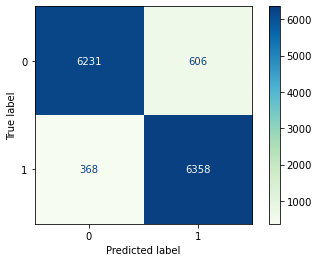

Confusion Matrix - normalised:


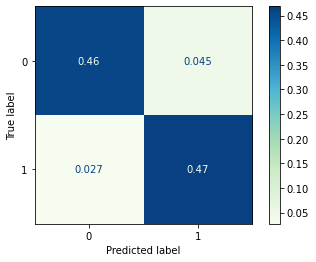

In [180]:
#choose which model to run. Logistic Regression: "logistic", K Nearest Neighbours: "knn", 
#Decision Tree: "decision_tree", Random Forest: "random_forest"

model_predictions("random_forest")

def firth_logit(X,y,num_iter=100,learning_rate=0.01):
    #Initialize weights
    weights = np.ones(X.shape[1])
    print (weights)
    #Define get_predictions function
    def get_predictions(X,weights):
        z = np.dot(X,weights)
        print (z)
        y_pred =  1/(1 + np.exp(-z))
        print (y_pred)
    #Perform gradient descent
    for i in range(num_iter):
        y_pred = get_predictions(X,weights)
        print (y_pred)
        #Calculate Fisher information matrix
        Xt = X.transpose()
        W = np.diag(y_pred*(1-y_pred))
        I = np.linalg.multi_dot([Xt,W,X])
        #Find diagonal of Hat Matrix
        sqrtW = W**0.5
        H = np.linalg.multi_dot([sqrtW,X,np.linalg.inv(I),Xt,sqrtW])
        hat_diag = np.diag(H)
        #Calculate U_star
        U_star = np.matmul((y -y_pred + hat_diag*(0.5 - y_pred)),X)
        #Update weights
        weights += np.matmul(np.linalg.inv(I),U_star)*learning_rate
        #Get final predictions
    y_pred =  get_predictions(X,weights)
    return y_pred

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier


X, y = make_blobs(centers=[[0, 0], [1, 1]], random_state=61526, n_samples=50)

def plot_forest(max_depth=1):
    plt.figure()
    ax = plt.gca()
    h = 0.02

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if max_depth != 0:
        forest = RandomForestClassifier(n_estimators=20, max_depth=max_depth,
                                        random_state=1).fit(X, y)
        Z = forest.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=.4)
        ax.set_title("max_depth = %d" % max_depth)
    else:
        ax.set_title("data set")
    ax.scatter(X[:, 0], X[:, 1], c=np.array(['b', 'r'])[y], s=60)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


def plot_forest_interactive():
    from IPython.html.widgets import interactive, IntSlider
    slider = IntSlider(min=0, max=8, step=1, value=0)
    return interactive(plot_forest, max_depth=slider)

plot_forest_interactive()

interactive(children=(IntSlider(value=0, description='max_depth', max=8), Output()), _dom_classes=('widget-int…